In [124]:
pip install matplotlib pandas IPython langdetect textblob numpy seaborn

In [0]:
import csv
import os, ssl
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException
from textblob import TextBlob
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
from scipy.stats import norm
from scipy.optimize import leastsq

plt.rcParams['font.size'] = 14
plt.rcParams['legend.fontsize'] = 'medium'

In [126]:
df = pd.read_csv("final_LIWC_categories.csv", usecols=["Tweet_id", "Tweet_time", "Tweet_content", "UserId", "date", "WC", "affect", "posemo", "negemo", "anx", "anger", "sad", "English_Country", "country_code"])
df.dropna(inplace=True)
df.head(5)

,Tweet_id,Tweet_time,Tweet_content,UserId,date,WC,affect,posemo,negemo,anx,anger,sad,English_Country,country_code
0,'1233690537116545025,Sat Feb 29 09:48:39 +0000 2020,RT @spectatorindex: BREAKING: First case of co...,'377470176,2020-02-29,9,0.0,0.0,0.0,0.0,0.0,0.0,Romania,RO
2,'1235327020869079043,Wed Mar 04 22:11:27 +0000 2020,RT @drluebbers: what people say. what people d...,'2575474256,2020-03-04,15,0.0,0.0,0.0,0.0,0.0,0.0,Germany,DE
5,'1233081198051721216,Thu Feb 27 17:27:21 +0000 2020,RT @Wu_Tang_Finance: This girl @coronavirus be...,'21499256,2020-02-27,12,0.0,0.0,0.0,0.0,0.0,0.0,United States of America,US
6,'1239362356800622594,Mon Mar 16 01:26:26 +0000 2020,La verdad creo que el primer caso de #COVIDー19...,'150820058,2020-03-16,27,0.0,0.0,0.0,0.0,0.0,0.0,Colombia,CO
7,'1228974065211277313,Sun Feb 16 09:27:05 +0000 2020,*hum hum* \nCoronavirus \n*hum hum* https://t....,'856882754600005632,2020-02-16,10,0.0,0.0,0.0,0.0,0.0,0.0,France,FR


In [0]:
def calculate_polarity(x):
    blob = TextBlob(x)
    return blob.sentiment.polarity


In [128]:
df['PolarityScore'] = df['Tweet_content'].apply(calculate_polarity)
df

,Tweet_id,Tweet_time,Tweet_content,UserId,date,WC,affect,posemo,negemo,anx,anger,sad,English_Country,country_code,PolarityScore
0,'1233690537116545025,Sat Feb 29 09:48:39 +0000 2020,RT @spectatorindex: BREAKING: First case of co...,'377470176,2020-02-29,9,0.00,0.0,0.00,0.0,0.0,0.0,Romania,RO,0.250000
2,'1235327020869079043,Wed Mar 04 22:11:27 +0000 2020,RT @drluebbers: what people say. what people d...,'2575474256,2020-03-04,15,0.00,0.0,0.00,0.0,0.0,0.0,Germany,DE,0.000000
5,'1233081198051721216,Thu Feb 27 17:27:21 +0000 2020,RT @Wu_Tang_Finance: This girl @coronavirus be...,'21499256,2020-02-27,12,0.00,0.0,0.00,0.0,0.0,0.0,United States of America,US,0.000000
6,'1239362356800622594,Mon Mar 16 01:26:26 +0000 2020,La verdad creo que el primer caso de #COVIDー19...,'150820058,2020-03-16,27,0.00,0.0,0.00,0.0,0.0,0.0,Colombia,CO,0.000000
7,'1228974065211277313,Sun Feb 16 09:27:05 +0000 2020,*hum hum* \nCoronavirus \n*hum hum* https://t....,'856882754600005632,2020-02-16,10,0.00,0.0,0.00,0.0,0.0,0.0,France,FR,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42346,'1231187194590760962,Sat Feb 22 12:01:16 +0000 2020,@nattybornkilla @LibertePensador @BeanK511 @CD...,'979413077996310528,2020-02-22,20,15.00,15.0,0.00,0.0,0.0,0.0,United States,US,0.533333
42347,'1229030707823095809,Sun Feb 16 13:12:09 +0000 2020,RT @DhakaTribune: #Taiwan confirms first #coro...,'2895077031,2020-02-16,12,0.00,0.0,0.00,0.0,0.0,0.0,Italy,IT,0.250000
42351,'1222775447546728448,Thu Jan 30 06:55:59 +0000 2020,RT @agueroangel: Que debemos hacer ante el pri...,'877047092539260928,2020-01-30,23,0.00,0.0,0.00,0.0,0.0,0.0,Argentina,AR,0.000000
42353,'1221421815089782784,Sun Jan 26 13:17:08 +0000 2020,RT @CP24: Paramedics union says pair of member...,'235633579,2020-01-26,21,0.00,0.0,0.00,0.0,0.0,0.0,Canada,CA,0.000000


In [0]:
def calculate_subjectivity(x):
    blob = TextBlob(x)
    return blob.sentiment.subjectivity

In [130]:
df['SubjectivityScore'] = df['Tweet_content'].apply(calculate_subjectivity)
df

,Tweet_id,Tweet_time,Tweet_content,UserId,date,WC,affect,posemo,negemo,anx,anger,sad,English_Country,country_code,PolarityScore,SubjectivityScore
0,'1233690537116545025,Sat Feb 29 09:48:39 +0000 2020,RT @spectatorindex: BREAKING: First case of co...,'377470176,2020-02-29,9,0.00,0.0,0.00,0.0,0.0,0.0,Romania,RO,0.250000,0.333333
2,'1235327020869079043,Wed Mar 04 22:11:27 +0000 2020,RT @drluebbers: what people say. what people d...,'2575474256,2020-03-04,15,0.00,0.0,0.00,0.0,0.0,0.0,Germany,DE,0.000000,0.000000
5,'1233081198051721216,Thu Feb 27 17:27:21 +0000 2020,RT @Wu_Tang_Finance: This girl @coronavirus be...,'21499256,2020-02-27,12,0.00,0.0,0.00,0.0,0.0,0.0,United States of America,US,0.000000,0.000000
6,'1239362356800622594,Mon Mar 16 01:26:26 +0000 2020,La verdad creo que el primer caso de #COVIDー19...,'150820058,2020-03-16,27,0.00,0.0,0.00,0.0,0.0,0.0,Colombia,CO,0.000000,0.000000
7,'1228974065211277313,Sun Feb 16 09:27:05 +0000 2020,*hum hum* \nCoronavirus \n*hum hum* https://t....,'856882754600005632,2020-02-16,10,0.00,0.0,0.00,0.0,0.0,0.0,France,FR,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42346,'1231187194590760962,Sat Feb 22 12:01:16 +0000 2020,@nattybornkilla @LibertePensador @BeanK511 @CD...,'979413077996310528,2020-02-22,20,15.00,15.0,0.00,0.0,0.0,0.0,United States,US,0.533333,0.500000
42347,'1229030707823095809,Sun Feb 16 13:12:09 +0000 2020,RT @DhakaTribune: #Taiwan confirms first #coro...,'2895077031,2020-02-16,12,0.00,0.0,0.00,0.0,0.0,0.0,Italy,IT,0.250000,0.333333
42351,'1222775447546728448,Thu Jan 30 06:55:59 +0000 2020,RT @agueroangel: Que debemos hacer ante el pri...,'877047092539260928,2020-01-30,23,0.00,0.0,0.00,0.0,0.0,0.0,Argentina,AR,0.000000,0.000000
42353,'1221421815089782784,Sun Jan 26 13:17:08 +0000 2020,RT @CP24: Paramedics union says pair of member...,'235633579,2020-01-26,21,0.00,0.0,0.00,0.0,0.0,0.0,Canada,CA,0.000000,1.000000


In [0]:
def get_filtered_country(countryCode):
  return df[df['country_code'] == countryCode]

In [0]:
def get_english_tweets(tweetContent):
  return df[detect(tweetContent) == "en"]

In [0]:
def group_tweets_by_date(country_df):
  filtered_tweets = country_df.groupby('date').mean()
  return filtered_tweets

In [0]:
def get_tweets_country_day(country):
  us_tweets_sentiments = get_filtered_country(country)
  print("Tweets per country")
  us_tweets_sentiments


  filtered_tweets = group_tweets_by_date(us_tweets_sentiments)
  print("Tweets group by day")
  return filtered_tweets
  


**Performing sentiment analysis on COVID-19 Spread due to tweets in US**



//To see the results for different countries such as,


1.   China = CN
2.   Europe = EU
3.   Italy = IT
4.   Spain = ES

Change "US" to any of the above mentioned country codes in ***get_tweets_country_day()***






In [233]:
us_tweets_aggregated = get_tweets_country_day('US')
us_tweets_aggregated.head(5)
len(us_tweets_aggregated)

Tweets per country
Tweets group by day


60

In [234]:
us_tweets_aggregated = us_tweets_aggregated.reset_index()
us_tweets_aggregated

,date,WC,affect,posemo,negemo,anx,anger,sad,PolarityScore,SubjectivityScore
0,2020-01-21,22.000000,9.090000,9.090000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
1,2020-01-22,21.454545,1.259091,1.259091,0.000000,0.000000,0.000000,0.000000,0.128650,0.237466
2,2020-01-23,21.631579,2.009211,1.000263,1.008947,0.109737,0.225000,0.449211,0.087298,0.299597
3,2020-01-24,20.848000,3.421680,1.962080,1.396880,0.592560,0.415680,0.255440,0.074289,0.346490
4,2020-01-25,20.311258,3.813642,2.014371,1.733377,0.457815,0.631523,0.205298,0.077088,0.296393
5,2020-01-26,20.145161,2.951075,1.303656,1.576667,0.288871,0.539409,0.114086,0.050923,0.288652
6,2020-01-27,21.070652,2.802880,1.455163,1.302772,0.438859,0.352772,0.114674,0.062757,0.300862
7,2020-01-28,20.818713,3.170292,1.414211,1.755906,0.320234,0.533216,0.139883,0.050274,0.307769
8,2020-01-29,20.195035,3.148191,1.383972,1.764468,0.299965,0.761738,0.174291,0.012109,0.243918
9,2020-01-30,19.711656,2.774785,1.381595,1.381012,0.348252,0.524417,0.141227,0.069728,0.294774


In [235]:
liwc_categories = us_tweets_aggregated.columns.to_list()

liwc_results = us_tweets_aggregated.values.tolist()
print(liwc_categories)
print(liwc_results[0])

['date', 'WC', 'affect', 'posemo', 'negemo', 'anx', 'anger', 'sad', 'PolarityScore', 'SubjectivityScore']
['2020-01-21', 22.0, 9.09, 9.09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5]


In [236]:
days = us_tweets_aggregated['date'].tolist()
print(days)

# the number of positive words
col = liwc_categories.index('posemo')
tweets_psemo_num = [liwc_results[i][col] for i in range(len(liwc_results))]
print(tweets_psemo_num[:10])

# the number of negative words
col = liwc_categories.index('negemo')
tweets_negemo_num = [liwc_results[i][col] for i in range(len(liwc_results))]
print(tweets_negemo_num[:10])

# the number of anxiety words
col = liwc_categories.index('anx')
tweets_anx_num = [liwc_results[i][col] for i in range(len(liwc_results))]
print(tweets_anx_num[:10])

# the number of anger words
col = liwc_categories.index('anger')
tweets_anger_num = [liwc_results[i][col] for i in range(len(liwc_results))]
print(tweets_anger_num[:10])

# the number of sad words
col = liwc_categories.index('sad')
tweets_sad_num = [liwc_results[i][col] for i in range(len(liwc_results))]
print(tweets_sad_num[:10])

['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21']
[9.09, 1.259090909090909, 1.0002631578947367, 1.9620800000000005, 2.0143708609271522, 1.3036559139784945, 1.4551630434782605, 1.4142105263157891, 1.38397163120

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


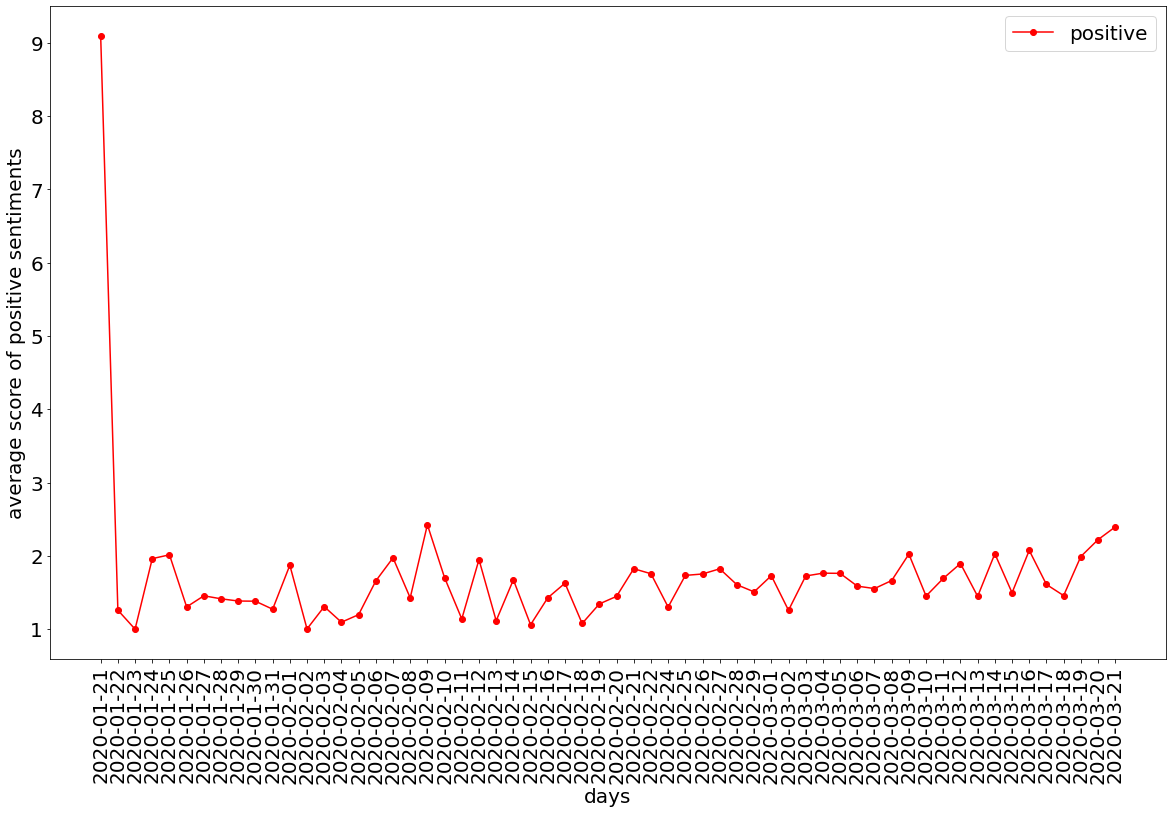

In [237]:
plt.figure(figsize=(20,12))
x=days
Y1=tweets_psemo_num
plt.plot(x, Y1, color = 'red', marker = 'o', label='positive')

plt.xlabel("days")
plt.xticks(rotation=90)
plt.ylabel('average score of positive sentiments')
plt.legend()
plt.savefig("positive.eps")
plt.show()

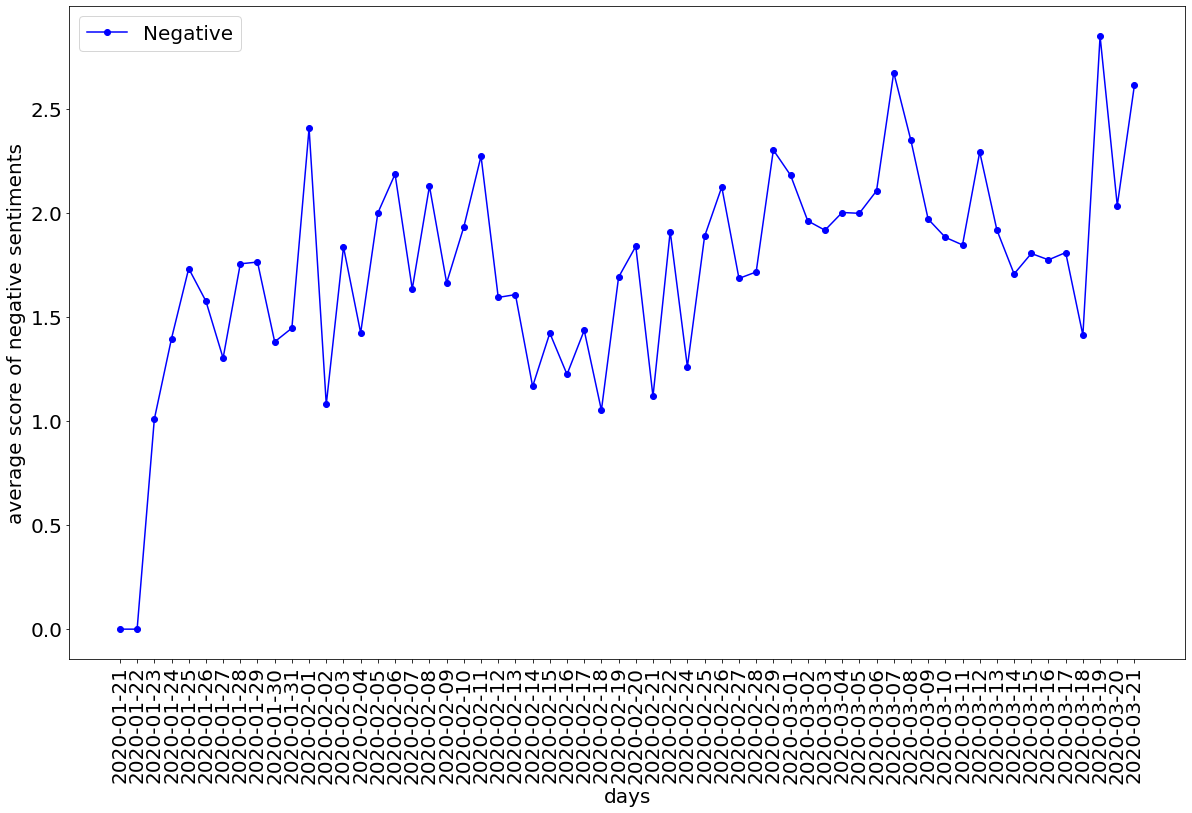

In [238]:
plt.figure(figsize=(20,12))
x=days
Y1=tweets_negemo_num
plt.plot(x, Y1, color = 'blue', marker = 'o', label='Negative')
plt.xlabel("days")
plt.xticks(rotation=90)
plt.ylabel('average score of negative sentiments')
plt.legend()
plt.show()

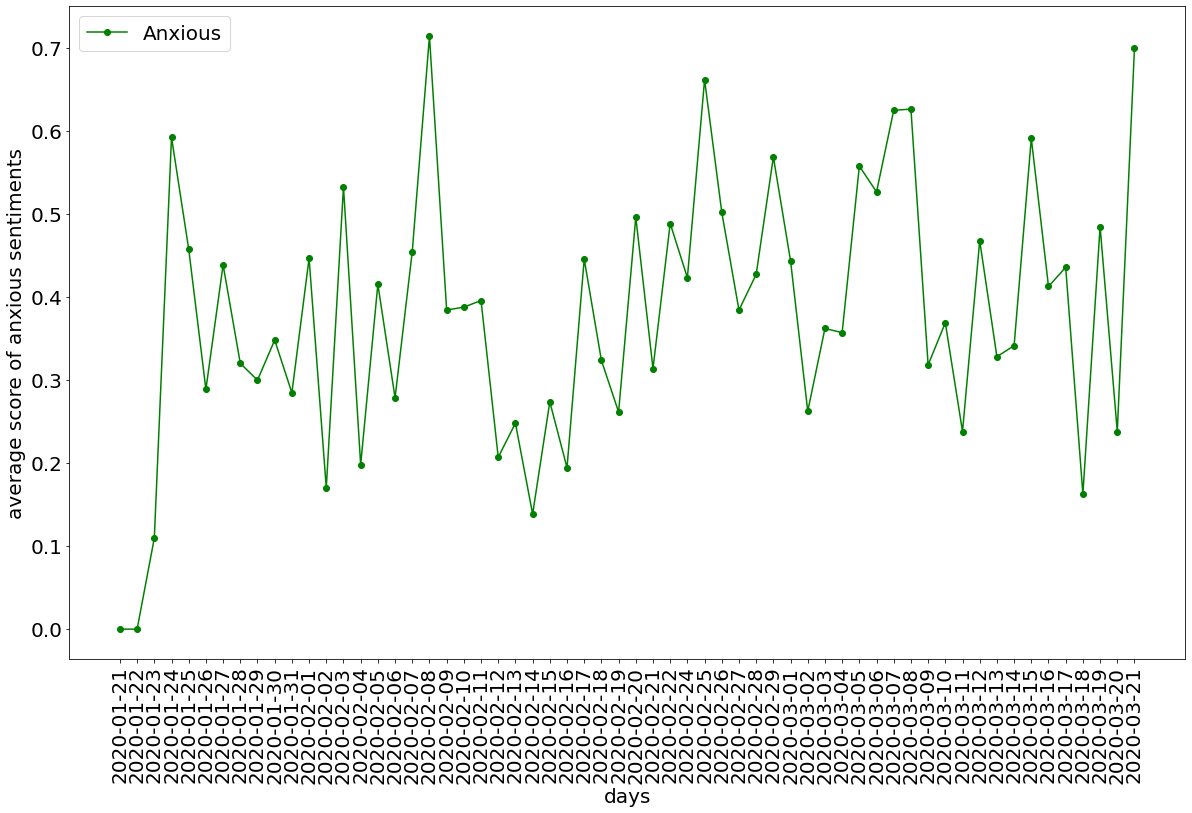

In [239]:
plt.figure(figsize=(20,12))
x=days
Y1=tweets_anx_num
plt.plot(x, Y1, color = 'green', marker = 'o', label='Anxious')
plt.xlabel("days")
plt.xticks(rotation=90)
plt.ylabel('average score of anxious sentiments')
plt.legend()
plt.show()

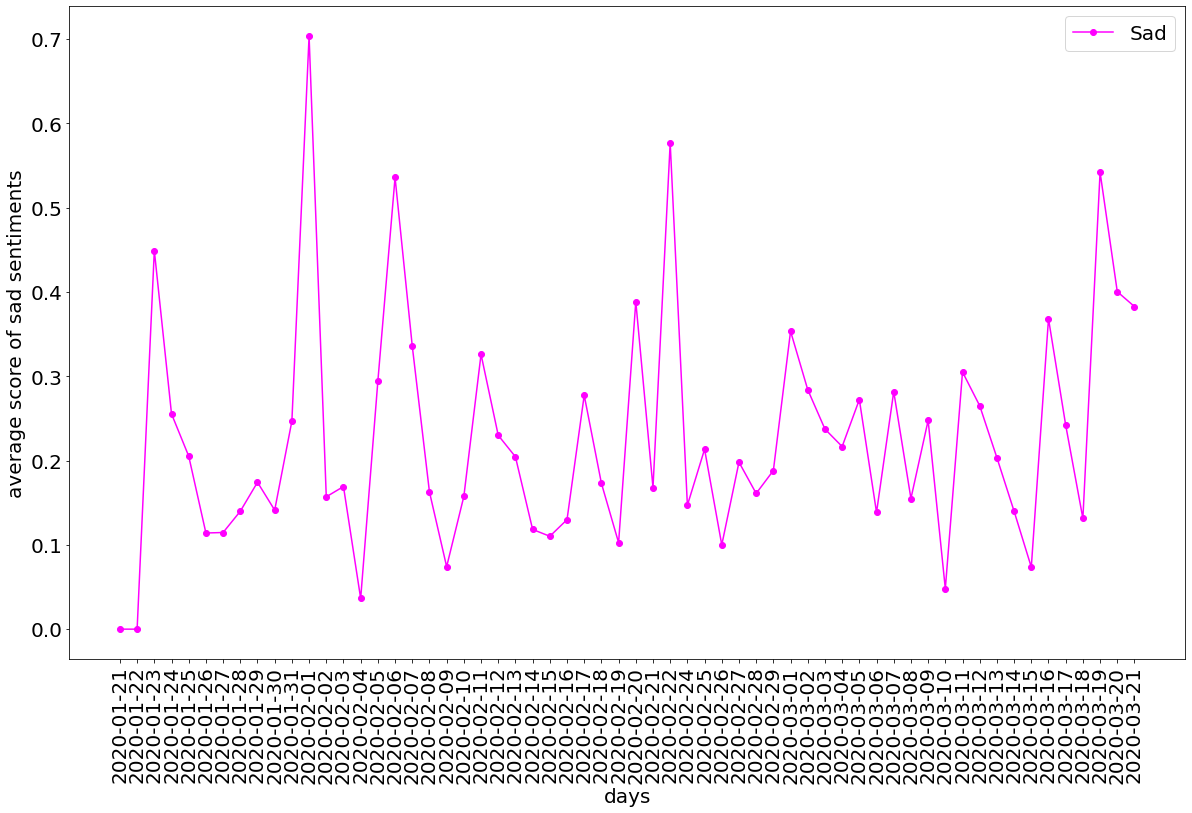

In [240]:
plt.figure(figsize=(20,12))
x=days
Y1=tweets_sad_num
plt.plot(x, Y1, color = 'magenta', marker = 'o', label='Sad')
plt.xlabel("days")
plt.xticks(rotation=90)
plt.ylabel('average score of sad sentiments')
plt.legend()
plt.show()

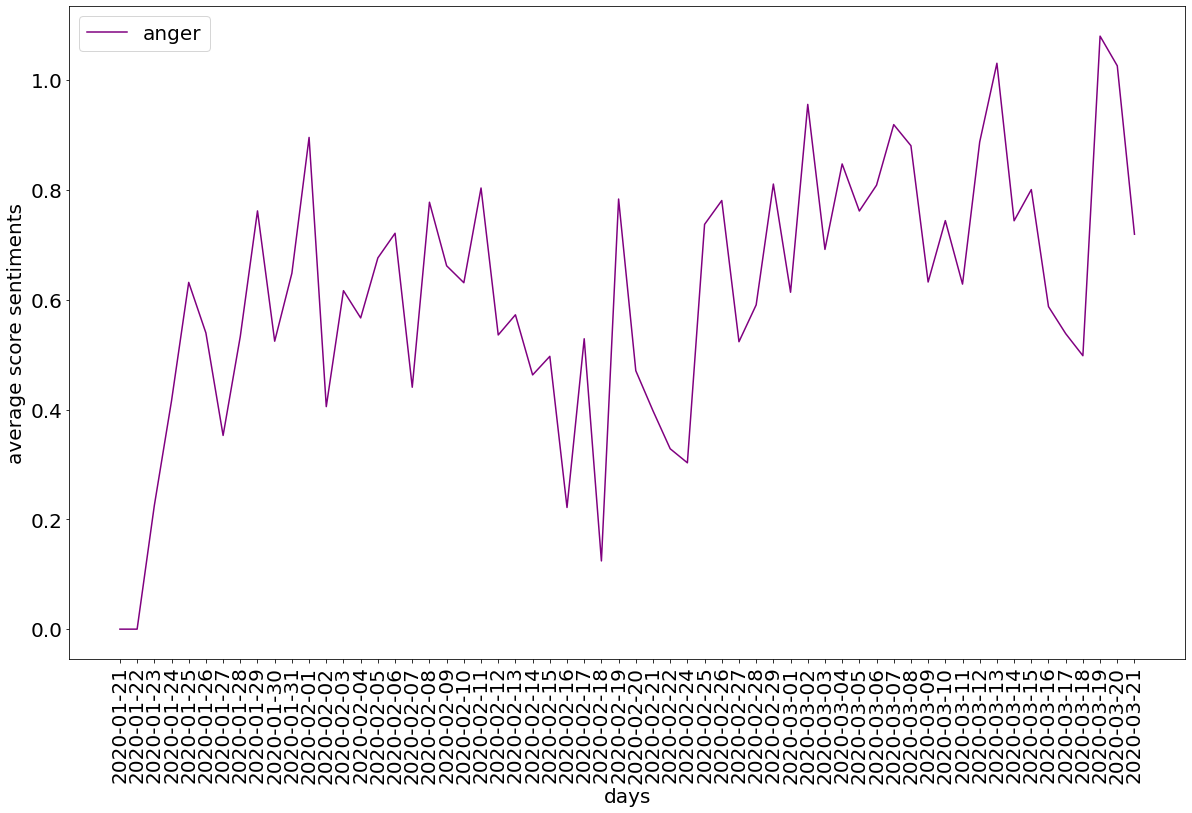

In [241]:
plt.figure(figsize=(20,12))
x=days
Y4 = tweets_anger_num
Y5 = tweets_sad_num
plt.plot(x, Y4, color = 'purple',label='anger')
#plt.plot(x, Y5, color = 'black',marker = '+',label='sad')
plt.xlabel("days")
plt.xticks(rotation=90)
plt.ylabel('average score sentiments')
plt.legend()
plt.show()

[0.0, 0.12865013774104683, 0.08729797979797978, 0.07428853923853927, 0.07708784868553081, 0.050923426372015086, 0.06275736139866572, 0.05027405248530979, 0.01210908690075357, 0.06972778344447247, 0.06250736855736852, 0.0414604913935271, 0.06252959927140256, 0.026963577097505676, 0.051392448292448295, 0.004756892566627082, 0.05599019707470413, 0.0858322880443782, 0.0024730363048947007, 0.021798026895943574, -0.030416073884383752, 0.0030896658598271454, 0.013386811755952382, 0.02298550889075083, 0.02830608540764793, 0.03795397487999529, 0.04427614732761792, 0.057734057074996466, 0.041202872444483195, 0.0035098853441244806, 0.09097804956047711, 0.03995536712455657, 0.03704400430487389, 0.055097195745131514, 0.05383374235310856, 0.04377009737084362, 0.027625175258154, 0.00734772781931873, 0.031977564743525866, 0.03450790883418317, 0.04686557388480468, 0.05494867477064186, 0.02748590728645747, 0.04617784394525689, 0.042663519430760806, 0.02923494098494098, 0.021564198988441415, 0.0080572327

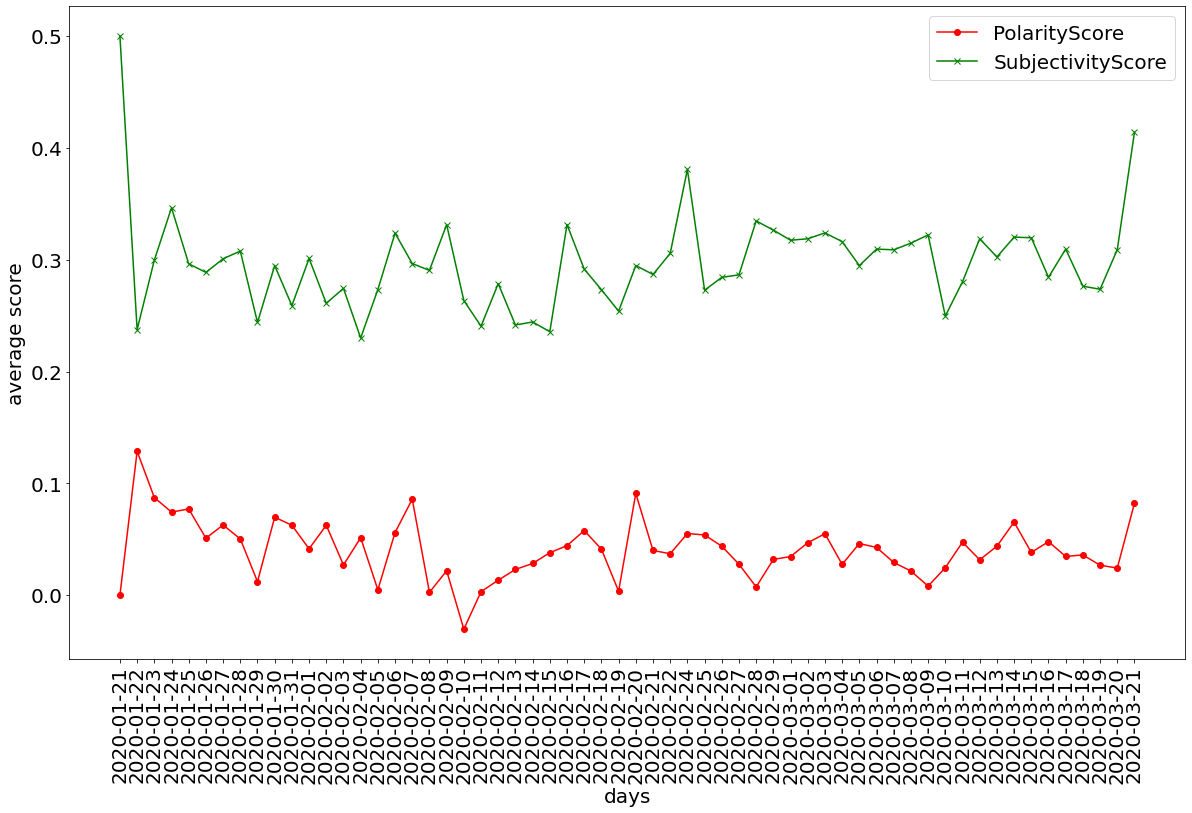

In [242]:
plt.figure(figsize=(20,12))
x=days
Y1=us_tweets_aggregated['PolarityScore'].tolist()
print(Y1)
Y2=us_tweets_aggregated['SubjectivityScore'].tolist()

plt.plot(x, Y1, color = 'red', marker = 'o', label='PolarityScore')
plt.plot(x, Y2, color = 'green',marker = 'x',label='SubjectivityScore')
plt.xlabel("days")
plt.xticks(rotation=90)
plt.ylabel('average score')
plt.legend()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


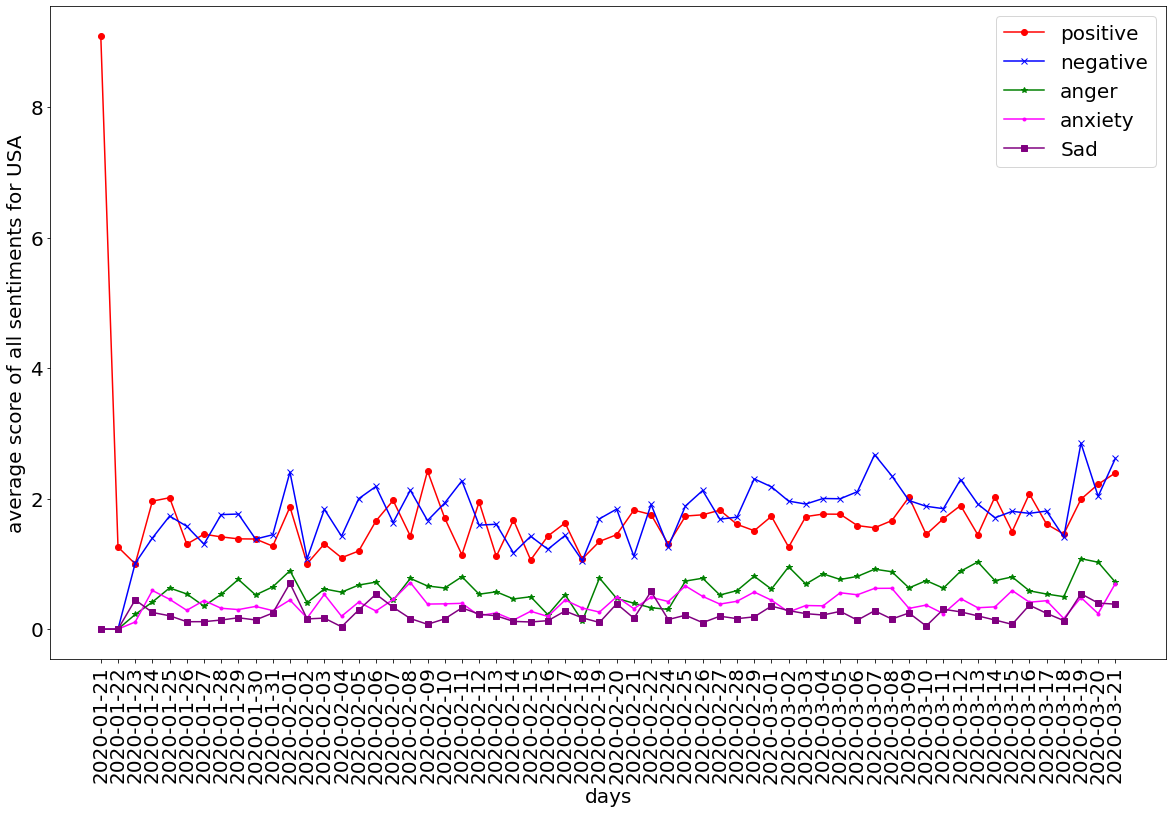

In [244]:

plt.figure(figsize=(20,12))
x=days
Y1=tweets_psemo_num
Y2=tweets_negemo_num
Y3=tweets_anger_num
Y4=tweets_anx_num
Y5=tweets_sad_num
plt.plot(x, Y1, color = 'Red', marker = 'o', label='positive')
plt.plot(x, Y2, color = 'blue', marker = 'x', label='negative')
plt.plot(x, Y3, color = 'green', marker = '*', label='anger')
plt.plot(x, Y4, color = 'magenta', marker = '.', label='anxiety')
plt.plot(x, Y5, color = 'purple', marker = 's', label='Sad')
plt.xlabel("days")
plt.xticks(rotation=90)
plt.ylabel('average score of all sentiments for USA')
plt.legend()
plt.savefig("all-sentiments-us.eps")
plt.show()